In [1]:
# set working dir
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.reload_library()
plt.style.use("science")
from matplotlib import cm

## Shortest Path 

In [3]:
df_spo = pd.read_csv("./res/sp/h5w5/wandb_export_sp-spo-d1000p4e0.5_eval.csv")

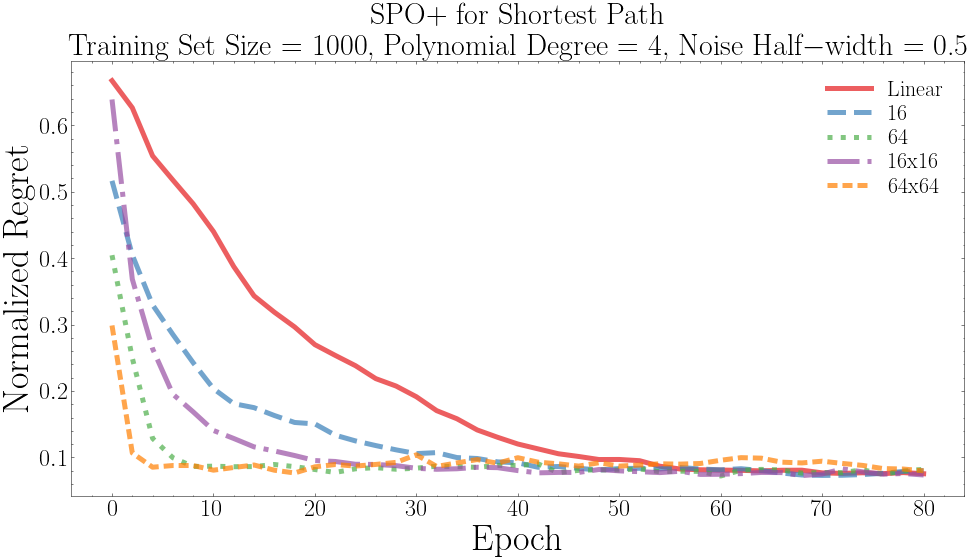

In [4]:
# color map
cmap = cm.get_cmap("Set1")
colors = cmap(np.linspace(0, 1, 9))
# epoch
xticks = range(0, len(df_spo), 5)
xtickslabel = [x * 2 for x in xticks]
# draw plot
fig = plt.figure(figsize=(16,8))
c = colors[0]
plt.plot(df_spo["glamorous-sweep-1 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="-", label="Linear")
c = colors[1]
plt.plot(df_spo["firm-sweep-2 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="--", label="16")
c = colors[2]
plt.plot(df_spo["fearless-sweep-3 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle=":", label="64")
c = colors[3]
plt.plot(df_spo["fresh-sweep-4 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="-.", label="16x16")
c = colors[4]
plt.plot(df_spo["driven-sweep-5 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle=(0, (2, 1)), label="64x64")
# labels and ticks
plt.xticks(ticks=xticks, labels=xtickslabel, fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("Epoch", fontsize=36)
plt.ylabel("Normalized Regret", fontsize=36)
plt.title("SPO+ for Shortest Path\nTraining Set Size = 1000, Polynomial Degree = 4, Noise Half−width = 0.5", fontsize=30)
plt.legend(fontsize=22, labelspacing=0.2, loc=1)
# save
plt.show()
fig.savefig("./images/nn-sp-spo", dpi=300)

In [5]:
df_dbb = pd.read_csv("./res/sp/h5w5/wandb_export_sp-bb-d1000p4e0.5_eval.csv")

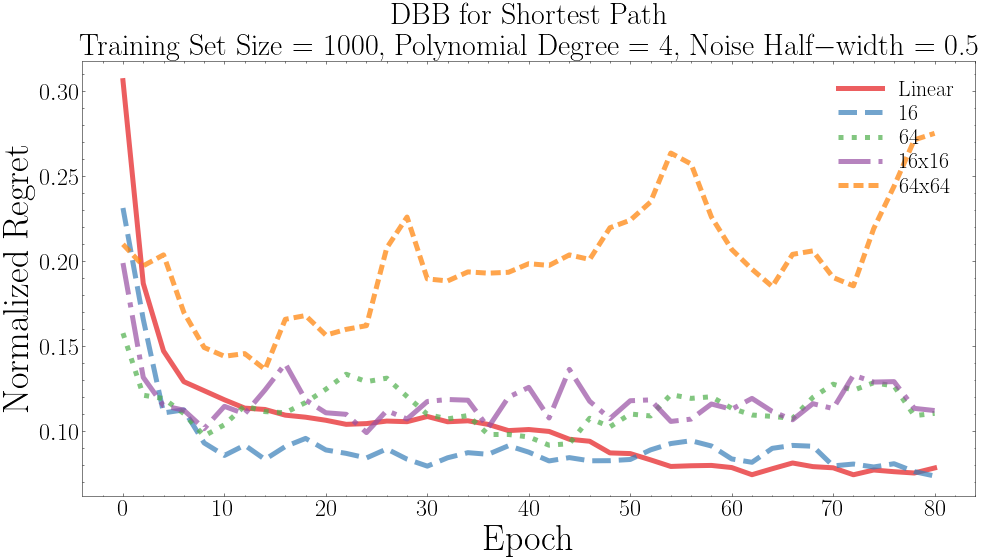

In [6]:
# color map
cmap = cm.get_cmap("Set1")
colors = cmap(np.linspace(0, 1, 9))
# epoch
xticks = range(0, len(df_spo), 5)
xtickslabel = [x * 2 for x in xticks]
# draw plot
fig = plt.figure(figsize=(16,8))
c = colors[0]
plt.plot(df_dbb["magic-sweep-1 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="-", label="Linear")
c = colors[1]
plt.plot(df_dbb["fallen-sweep-2 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="--", label="16")
c = colors[2]
plt.plot(df_dbb["still-sweep-3 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle=":", label="64")
c = colors[3]
plt.plot(df_dbb["glowing-sweep-4 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="-.", label="16x16")
c = colors[4]
plt.plot(df_dbb["glorious-sweep-5 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle=(0, (2, 1)), label="64x64")
# labels and ticks
plt.xticks(ticks=xticks, labels=xtickslabel, fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("Epoch", fontsize=36)
plt.ylabel("Normalized Regret", fontsize=36)
plt.title("DBB for Shortest Path\nTraining Set Size = 1000, Polynomial Degree = 4, Noise Half−width = 0.5", fontsize=30)
plt.legend(fontsize=22, labelspacing=0.2, loc=1)
# save
plt.show()
fig.savefig("./images/nn-sp-dbb", dpi=300)

## Knapsack 

In [7]:
df_spo = pd.read_csv("./res/ks/i32d2c20/wandb_export_ks-spo-d1000p4e0.5_eval.csv")

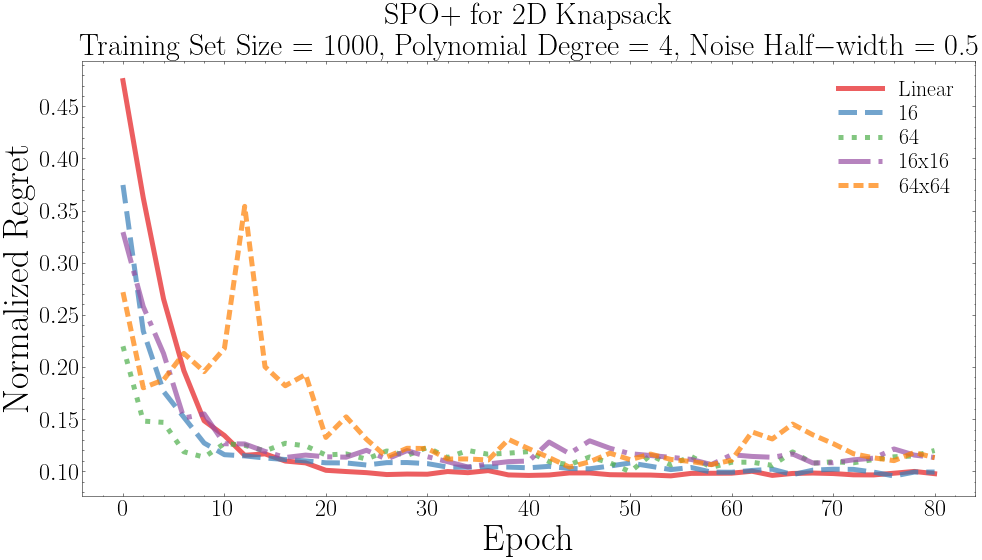

In [8]:
# color map
cmap = cm.get_cmap("Set1")
colors = cmap(np.linspace(0, 1, 9))
# epoch
xticks = range(0, len(df_spo), 5)
xtickslabel = [x * 2 for x in xticks]
# draw plot
fig = plt.figure(figsize=(16,8))
c = colors[0]
plt.plot(df_spo["prime-sweep-1 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="-", label="Linear")
c = colors[1]
plt.plot(df_spo["stilted-sweep-2 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="--", label="16")
c = colors[2]
plt.plot(df_spo["lyric-sweep-3 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle=":", label="64")
c = colors[3]
plt.plot(df_spo["cool-sweep-4 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="-.", label="16x16")
c = colors[4]
plt.plot(df_spo["fresh-sweep-5 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle=(0, (2, 1)), label="64x64")
# labels and ticks
plt.xticks(ticks=xticks, labels=xtickslabel, fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("Epoch", fontsize=36)
plt.ylabel("Normalized Regret", fontsize=36)
plt.title("SPO+ for 2D Knapsack\nTraining Set Size = 1000, Polynomial Degree = 4, Noise Half−width = 0.5", fontsize=30)
plt.legend(fontsize=22, labelspacing=0.2, loc=1)
# save
plt.show()
fig.savefig("./images/nn-ks-spo", dpi=300)

In [9]:
df_dbb = pd.read_csv("./res/ks/i32d2c20/wandb_export_ks-bb-d1000p4e0.5_eval.csv")

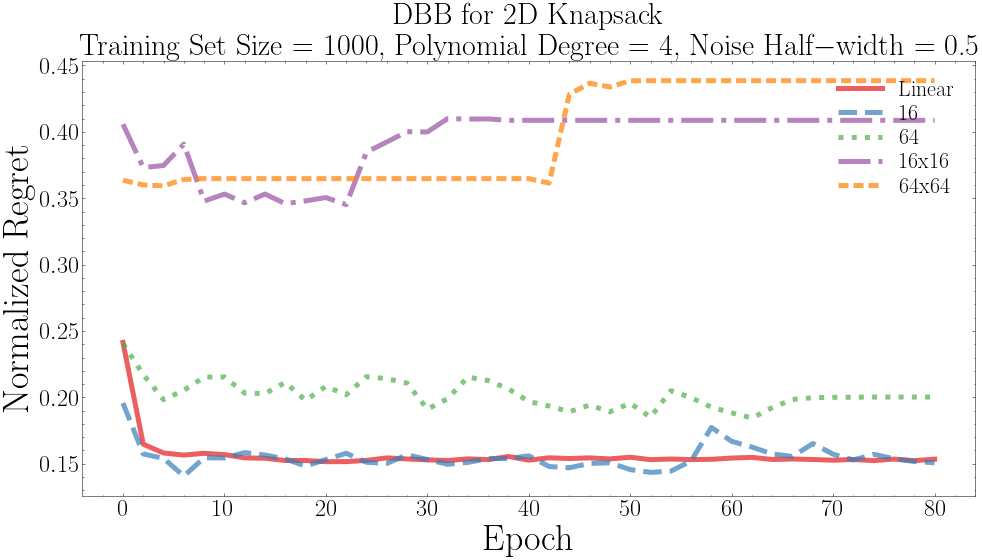

In [10]:
# color map
cmap = cm.get_cmap("Set1")
colors = cmap(np.linspace(0, 1, 9))
# iters
xticks = range(0, len(df_spo), 5)
xtickslabel = [x * 2 for x in xticks]
# draw plot
fig = plt.figure(figsize=(16,8))
c = colors[0]
plt.plot(df_dbb["genial-sweep-1 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="-", label="Linear")
c = colors[1]
plt.plot(df_dbb["fancy-sweep-2 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="--", label="16")
c = colors[2]
plt.plot(df_dbb["fragrant-sweep-3 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle=":", label="64")
c = colors[3]
plt.plot(df_dbb["legendary-sweep-4 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="-.", label="16x16")
c = colors[4]
plt.plot(df_dbb["sleek-sweep-5 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle=(0, (2, 1)), label="64x64")
# labels and ticks
plt.xticks(ticks=xticks, labels=xtickslabel, fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("Epoch", fontsize=36)
plt.ylabel("Normalized Regret", fontsize=36)
plt.title("DBB for 2D Knapsack\nTraining Set Size = 1000, Polynomial Degree = 4, Noise Half−width = 0.5", fontsize=30)
plt.legend(fontsize=22, labelspacing=0.2, loc=1)
# save
plt.show()
fig.savefig("./images/nn-ks-dbb", dpi=300)

## TSP 

In [11]:
df_spo = pd.read_csv("./res/tsp/n20/dfj/wandb_export_tsp-spo-d1000p4e0.5_eval.csv")

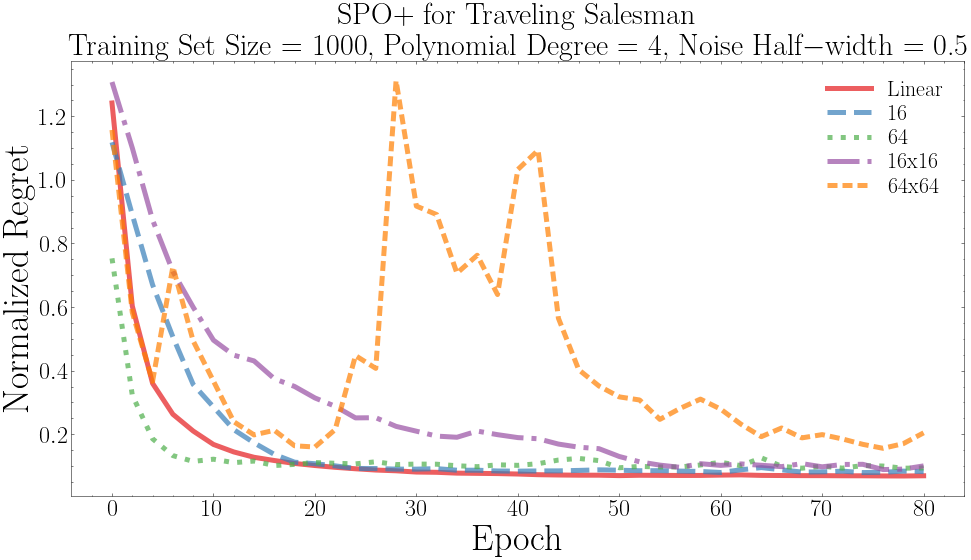

In [12]:
# color map
cmap = cm.get_cmap("Set1")
colors = cmap(np.linspace(0, 1, 9))
# epoch
xticks = range(0, len(df_spo), 5)
xtickslabel = [x * 2 for x in xticks]
# draw plot
fig = plt.figure(figsize=(16,8))
c = colors[0]
plt.plot(df_spo["sweet-sweep-1 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="-", label="Linear")
c = colors[1]
plt.plot(df_spo["lemon-sweep-2 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="--", label="16")
c = colors[2]
plt.plot(df_spo["summer-sweep-3 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle=":", label="64")
c = colors[3]
plt.plot(df_spo["genial-sweep-4 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="-.", label="16x16")
c = colors[4]
plt.plot(df_spo["sunny-sweep-5 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle=(0, (2, 1)), label="64x64")
# labels and ticks
plt.xticks(ticks=xticks, labels=xtickslabel, fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("Epoch", fontsize=36)
plt.ylabel("Normalized Regret", fontsize=36)
plt.title("SPO+ for Traveling Salesman\nTraining Set Size = 1000, Polynomial Degree = 4, Noise Half−width = 0.5", fontsize=30)
plt.legend(fontsize=22, labelspacing=0.2, loc=1)
# save
plt.show()
fig.savefig("./images/nn-tsp-spo", dpi=300)

In [13]:
df_dbb = pd.read_csv("./res/tsp/n20/dfj/wandb_export_tsp-bb-d1000p4e0.5_eval.csv")

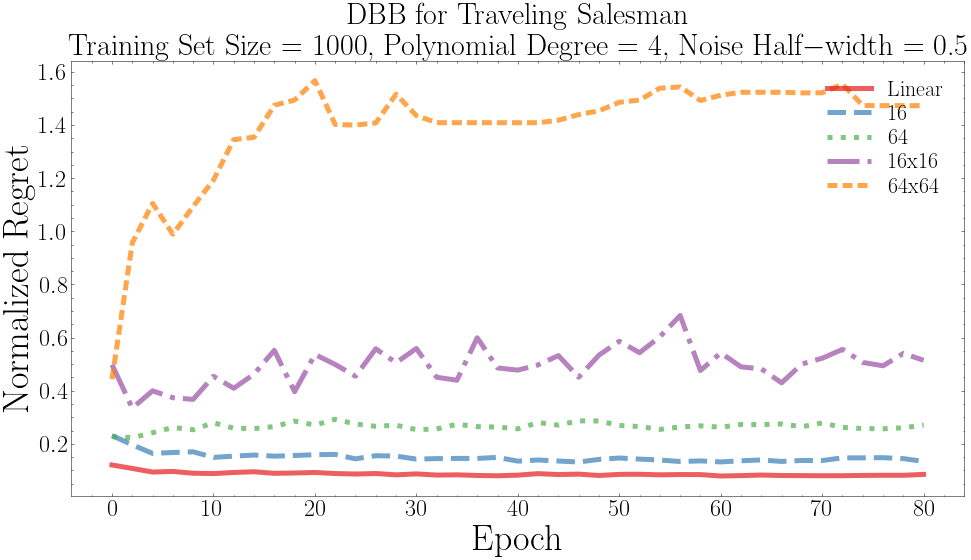

In [14]:
# color map
cmap = cm.get_cmap("Set1")
colors = cmap(np.linspace(0, 1, 9))
# epoch
xticks = range(0, len(df_spo), 5)
xtickslabel = [x * 2 for x in xticks]
# draw plot
fig = plt.figure(figsize=(16,8))
c = colors[0]
plt.plot(df_dbb["absurd-sweep-1 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="-", label="Linear")
c = colors[1]
plt.plot(df_dbb["olive-sweep-2 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="--", label="16")
c = colors[2]
plt.plot(df_dbb["pleasant-sweep-3 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle=":", label="64")
c = colors[3]
plt.plot(df_dbb["wandering-sweep-4 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle="-.", label="16x16")
c = colors[4]
plt.plot(df_dbb["easy-sweep-5 - Regret"], color=c, linewidth=5, alpha=0.7, linestyle=(0, (2, 1)), label="64x64")
# labels and ticks
plt.xticks(ticks=xticks, labels=xtickslabel, fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("Epoch", fontsize=36)
plt.ylabel("Normalized Regret", fontsize=36)
plt.title("DBB for Traveling Salesman\nTraining Set Size = 1000, Polynomial Degree = 4, Noise Half−width = 0.5", fontsize=30)
plt.legend(fontsize=22, labelspacing=0.2, loc=1)
# save
plt.show()
fig.savefig("./images/nn-tsp-dbb", dpi=300)